# Loading the Dataset

In [2]:
!pip install scikit-learn pandas numpy shap fairlearn xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.0/240.0 kB 4.5 MB/s eta 0:00:00


In [3]:
!pip install --upgrade scikit-learn xgboost

In [4]:
!wget https://raw.githubusercontent.com/propublica/compas-analysis/master/compas-scores-two-years.csv -P /usr/local/lib/python3.11/dist-packages/aif360/data/raw/compas/

--2025-02-17 07:04:43--  https://raw.githubusercontent.com/propublica/compas-analysis/master/compas-scores-two-years.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2546489 (2.4M) [text/plain]
Saving to: ‘/usr/local/lib/python3.11/dist-packages/aif360/data/raw/compas/compas-scores-two-years.csv’

compas-scores-two-y 100%[===================>]   2.43M  6.86MB/s    in 0.4s    

2025-02-17 07:04:44 (6.86 MB/s) - ‘/usr/local/lib/python3.11/dist-packages/aif360/data/raw/compas/compas-scores-two-years.csv’ saved [2546489/2546489]



In [5]:
ls -lh /usr/local/lib/python3.11/dist-packages/aif360/data/raw/compas/

total 2.5M
-rw-r--r-- 1 root root 2.5M Feb 17 07:04 compas-scores-two-years.csv


In [6]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [7]:
# Define the file path
file_path = "/usr/local/lib/python3.11/dist-packages/aif360/data/raw/compas/compas-scores-two-years.csv"

# Load the dataset
df = pd.read_csv(file_path)

# Display first few rows
df.head()

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,c_jail_in,c_jail_out,c_case_number,c_offense_date,c_arrest_date,c_days_from_compas,c_charge_degree,c_charge_desc,is_recid,r_case_number,r_charge_degree,r_days_from_arrest,r_offense_date,r_charge_desc,r_jail_in,r_jail_out,violent_recid,is_violent_recid,vr_case_number,vr_charge_degree,vr_offense_date,vr_charge_desc,type_of_assessment,decile_score.1,score_text,screening_date,v_type_of_assessment,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,0,1,0,0,0,-1.0,2013-08-13 06:03:42,2013-08-14 05:41:20,13011352CF10A,2013-08-13,NaN,1.0,F,Aggravated Assault w/Firearm,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,1,Low,2013-08-14,Risk of Violence,1,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0,0
1,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,0,3,0,0,0,-1.0,2013-01-26 03:45:27,2013-02-05 05:36:53,13001275CF10A,2013-01-26,NaN,1.0,F,Felony Battery w/Prior Convict,1,13009779CF10A,(F3),NaN,2013-07-05,Felony Battery (Dom Strang),NaN,NaN,NaN,1,13009779CF10A,(F3),2013-07-05,Felony Battery (Dom Strang),Risk of Recidivism,3,Low,2013-01-27,Risk of Violence,1,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1
2,4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,0,4,0,1,4,-1.0,2013-04-13 04:58:34,2013-04-14 07:02:04,13005330CF10A,2013-04-13,NaN,1.0,F,Possession of Cocaine,1,13011511MM10A,(M1),0.0,2013-06-16,Driving Under The Influence,2013-06-16,2013-06-16,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,4,Low,2013-04-14,Risk of Violence,3,Low,2013-04-14,2013-06-16,2013-06-16,4,0,63,0,1
3,5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,0,8,1,0,1,NaN,NaN,NaN,13000570CF10A,2013-01-12,NaN,1.0,F,Possession of Cannabis,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,8,High,2013-01-13,Risk of Violence,6,Medium,2013-01-13,NaN,NaN,1,0,1174,0,0
4,6,bouthy pierrelouis,bouthy,pierrelouis,2013-03-26,Male,1973-01-22,43,25 - 45,Other,0,1,0,0,2,NaN,NaN,NaN,12014130CF10A,NaN,2013-01-09,76.0,F,arrest case no charge,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,1,Low,2013-03-26,Risk of Violence,1,Low,2013-03-26,NaN,NaN,2,0,1102,0,0


In [8]:
df.shape

(7214, 53)

In [9]:
df.columns

Index(['id', 'name', 'first', 'last', 'compas_screening_date', 'sex', 'dob',
       'age', 'age_cat', 'race', 'juv_fel_count', 'decile_score',
       'juv_misd_count', 'juv_other_count', 'priors_count',
       'days_b_screening_arrest', 'c_jail_in', 'c_jail_out', 'c_case_number',
       'c_offense_date', 'c_arrest_date', 'c_days_from_compas',
       'c_charge_degree', 'c_charge_desc', 'is_recid', 'r_case_number',
       'r_charge_degree', 'r_days_from_arrest', 'r_offense_date',
       'r_charge_desc', 'r_jail_in', 'r_jail_out', 'violent_recid',
       'is_violent_recid', 'vr_case_number', 'vr_charge_degree',
       'vr_offense_date', 'vr_charge_desc', 'type_of_assessment',
       'decile_score.1', 'score_text', 'screening_date',
       'v_type_of_assessment', 'v_decile_score', 'v_score_text',
       'v_screening_date', 'in_custody', 'out_custody', 'priors_count.1',
       'start', 'end', 'event', 'two_year_recid'],
      dtype='object')

# Preprocessing & Cleaning

In [10]:
df["two_year_recid"].value_counts()

,count
two_year_recid,
0,3963
1,3251


In [11]:
df["is_recid"].value_counts()

,count
is_recid,
0,3743
1,3471


In [12]:
(df['two_year_recid']==df['is_recid']).value_counts()

,count
True,6994
False,220


### **Identifiers & Personal Information:**
1. **'id'** – Unique identifier for each individual in the dataset.  
2. **'name'** – Full name of the individual.  
3. **'first'** – First name of the individual.  
4. **'last'** – Last name of the individual.  
5. **'dob'** – Date of birth.  
6. **'sex'** – Gender of the individual (Male/Female).  
7. **'race'** – Ethnicity of the individual (e.g., African-American, Caucasian, etc.).  

In [13]:
columns_to_drop = ['id','name','first','last','dob','sex','race']

### **Demographic & Age Information:**
8. **'age'** – Age of the individual at the time of assessment.  
9. **'age_cat'** – Categorized age groups (e.g., 18-25, 26-45, 46+).  

### **Criminal History & Prior Records:**
10. **'juv_fel_count'** – Number of juvenile felony convictions.  
11. **'juv_misd_count'** – Number of juvenile misdemeanor convictions.  
12. **'juv_other_count'** – Number of other juvenile offenses.  
13. **'priors_count'** – Total number of prior adult convictions.  

In [14]:
columns_to_drop += ['juv_other_count']

### **Current Case Information:**
14. **'compas_screening_date'** – Date when the COMPAS risk assessment was conducted.  
15. **'c_case_number'** – Unique identifier for the individual's criminal case.  
16. **'c_offense_date'** – Date of the current offense.  
17. **'c_arrest_date'** – Date of the arrest for the current charge.  
18. **'c_charge_degree'** – Severity of the current charge (M = Misdemeanor, F = Felony).  
19. **'c_charge_desc'** – Description of the current charge (e.g., 'Grand Theft', 'Drug Possession').  
20. **'c_days_from_compas'** – Number of days between COMPAS assessment and the current case.  

In [15]:
columns_to_drop += ['compas_screening_date','c_arrest_date','c_days_from_compas', 'c_case_number','c_offense_date']

### **Jail Custody Information:**
21. **'c_jail_in'** – Date the individual was jailed for the current offense.  
22. **'c_jail_out'** – Date the individual was released from jail for the current offense.

In [16]:
columns_to_drop += ['c_jail_in','c_jail_out']

### **Recidivism (Reoffense) Information:**
23. **'is_recid'** – 1 if the individual reoffended, 0 otherwise.  
24. **'two_year_recid'** – 1 if the individual reoffended within two years, 0 otherwise.  


### **Reoffense Case Details:**
25. **'r_case_number'** – Case number for the recidivism offense.  
26. **'r_offense_date'** – Date of the reoffense.  
27. **'r_arrest_date'** – Date of arrest for the reoffense.  
28. **'r_days_from_arrest'** – Days between the original offense and the reoffense.  
29. **'r_charge_degree'** – Severity of the reoffense (M = Misdemeanor, F = Felony).  
30. **'r_charge_desc'** – Description of the reoffense charge.  
31. **'r_jail_in'** – Jail entry date for the reoffense.  
32. **'r_jail_out'** – Jail exit date for the reoffense.  

In [17]:
columns_to_drop += ['r_case_number', 'r_offense_date', 'r_days_from_arrest', 'r_days_from_arrest', 'r_jail_in', 'r_jail_out']

### **Violent Recidivism Information:**
33. **'violent_recid'** – Number of times the individual has committed a violent reoffense.  
34. **'is_violent_recid'** – 1 if the individual committed a violent reoffense, 0 otherwise.  
35. **'vr_case_number'** – Case number for violent recidivism.  
36. **'vr_offense_date'** – Date of the violent reoffense.  
37. **'vr_charge_degree'** – Severity of the violent reoffense (M = Misdemeanor, F = Felony).  
38. **'vr_charge_desc'** – Description of the violent reoffense charge.  

In [18]:
columns_to_drop += ['vr_case_number', 'vr_offense_date']

### **COMPAS Risk Assessment Scores:**
39. **'type_of_assessment'** – Type of risk assessment (e.g., General Recidivism, Violent Recidivism).  
40. **'decile_score'** – Risk score (1-10) predicting likelihood of recidivism.  
41. **'score_text'** – Categorical risk level based on 'decile_score' (Low, Medium, High).  
42. **'decile_score.1'** – Duplicate of 'decile_score'.  

In [19]:
columns_to_drop += ['type_of_assessment','decile_score.1']

### **Violent Recidivism Risk Scores:**
43. **'v_type_of_assessment'** – Type of assessment for violent recidivism.  
44. **'v_decile_score'** – Risk score (1-10) predicting violent reoffense.  
45. **'v_score_text'** – Categorical risk level for violent recidivism (Low, Medium, High).  
46. **'v_screening_date'** – Date of the violent recidivism assessment.  

In [20]:
columns_to_drop += ['v_type_of_assessment','v_screening_date']

### **Additional Features & Redundant Columns:**
47. **'days_b_screening_arrest'** – Days between arrest and COMPAS screening.  
48. **'priors_count.1'** – Duplicate of 'priors_count'.  
49. **'in_custody'** – Date when the person entered custody.  
50. **'out_custody'** – Date when the person left custody.  
51. **'start'** – Beginning of a time-based event (not clearly defined).  
52. **'end'** – End of a time-based event (not clearly defined).  
53. **'event'** – An unspecified event indicator.  


In [21]:
columns_to_drop += ['days_b_screening_arrest','priors_count.1','in_custody','out_custody','start','end','event']

In [22]:
columns_to_drop

['id',
 'name',
 'first',
 'last',
 'dob',
 'sex',
 'race',
 'juv_other_count',
 'compas_screening_date',
 'c_arrest_date',
 'c_days_from_compas',
 'c_case_number',
 'c_offense_date',
 'c_jail_in',
 'c_jail_out',
 'r_case_number',
 'r_offense_date',
 'r_days_from_arrest',
 'r_days_from_arrest',
 'r_jail_in',
 'r_jail_out',
 'vr_case_number',
 'vr_offense_date',
 'type_of_assessment',
 'decile_score.1',
 'v_type_of_assessment',
 'v_screening_date',
 'days_b_screening_arrest',
 'priors_count.1',
 'in_custody',
 'out_custody',
 'start',
 'end',
 'event']

In [23]:
df = df.drop(columns=columns_to_drop,axis=1)

In [24]:
df.head()

,age,age_cat,juv_fel_count,decile_score,juv_misd_count,priors_count,c_charge_degree,c_charge_desc,is_recid,r_charge_degree,r_charge_desc,violent_recid,is_violent_recid,vr_charge_degree,vr_charge_desc,score_text,screening_date,v_decile_score,v_score_text,two_year_recid
0,69,Greater than 45,0,1,0,0,F,Aggravated Assault w/Firearm,0,NaN,NaN,NaN,0,NaN,NaN,Low,2013-08-14,1,Low,0
1,34,25 - 45,0,3,0,0,F,Felony Battery w/Prior Convict,1,(F3),Felony Battery (Dom Strang),NaN,1,(F3),Felony Battery (Dom Strang),Low,2013-01-27,1,Low,1
2,24,Less than 25,0,4,0,4,F,Possession of Cocaine,1,(M1),Driving Under The Influence,NaN,0,NaN,NaN,Low,2013-04-14,3,Low,1
3,23,Less than 25,0,8,1,1,F,Possession of Cannabis,0,NaN,NaN,NaN,0,NaN,NaN,High,2013-01-13,6,Medium,0
4,43,25 - 45,0,1,0,2,F,arrest case no charge,0,NaN,NaN,NaN,0,NaN,NaN,Low,2013-03-26,1,Low,0


In [25]:
df.shape

(7214, 20)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7214 entries, 0 to 7213
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               7214 non-null   int64  
 1   age_cat           7214 non-null   object 
 2   juv_fel_count     7214 non-null   int64  
 3   decile_score      7214 non-null   int64  
 4   juv_misd_count    7214 non-null   int64  
 5   priors_count      7214 non-null   int64  
 6   c_charge_degree   7214 non-null   object 
 7   c_charge_desc     7185 non-null   object 
 8   is_recid          7214 non-null   int64  
 9   r_charge_degree   3471 non-null   object 
 10  r_charge_desc     3413 non-null   object 
 11  violent_recid     0 non-null      float64
 12  is_violent_recid  7214 non-null   int64  
 13  vr_charge_degree  819 non-null    object 
 14  vr_charge_desc    819 non-null    object 
 15  score_text        7214 non-null   object 
 16  screening_date    7214 non-null   object 


In [27]:
print(df.isnull().sum())

age                    0
age_cat                0
juv_fel_count          0
decile_score           0
juv_misd_count         0
priors_count           0
c_charge_degree        0
c_charge_desc         29
is_recid               0
r_charge_degree     3743
r_charge_desc       3801
violent_recid       7214
is_violent_recid       0
vr_charge_degree    6395
vr_charge_desc      6395
score_text             0
screening_date         0
v_decile_score         0
v_score_text           0
two_year_recid         0
dtype: int64


In [28]:
for col in df.columns:
    if df[col].dtype == 'object':
        print(f"Unique values for column '{col}':")
        print(df[col].value_counts())
        print("-" * 20)

Unique values for column 'age_cat':
age_cat
25 - 45            4109
Greater than 45    1576
Less than 25       1529
Name: count, dtype: int64
--------------------
Unique values for column 'c_charge_degree':
c_charge_degree
F    4666
M    2548
Name: count, dtype: int64
--------------------
Unique values for column 'c_charge_desc':
c_charge_desc
Battery                           1156
arrest case no charge             1137
Possession of Cocaine              474
Grand Theft in the 3rd Degree      425
Driving While License Revoked      200
                                  ... 
Solicit Purchase Cocaine             1
Compulsory Sch Attnd Violation       1
Battery On Fire Fighter              1
Oper Motorcycle W/O Valid DL         1
Possession of XLR11                  1
Name: count, Length: 437, dtype: int64
--------------------
Unique values for column 'r_charge_degree':
r_charge_degree
(M1)     1201
(M2)     1107
(F3)      892
(F2)      168
(F1)       51
(MO3)      39
(F7)        7
(F6)   

In [29]:
columns = ['r_charge_degree', 'r_charge_desc', 'vr_charge_degree', 'vr_charge_desc','violent_recid']
df = df.drop(columns=columns,axis=1)
df.head()

,age,age_cat,juv_fel_count,decile_score,juv_misd_count,priors_count,c_charge_degree,c_charge_desc,is_recid,is_violent_recid,score_text,screening_date,v_decile_score,v_score_text,two_year_recid
0,69,Greater than 45,0,1,0,0,F,Aggravated Assault w/Firearm,0,0,Low,2013-08-14,1,Low,0
1,34,25 - 45,0,3,0,0,F,Felony Battery w/Prior Convict,1,1,Low,2013-01-27,1,Low,1
2,24,Less than 25,0,4,0,4,F,Possession of Cocaine,1,0,Low,2013-04-14,3,Low,1
3,23,Less than 25,0,8,1,1,F,Possession of Cannabis,0,0,High,2013-01-13,6,Medium,0
4,43,25 - 45,0,1,0,2,F,arrest case no charge,0,0,Low,2013-03-26,1,Low,0


In [30]:
df['c_charge_desc'].dropna()

,c_charge_desc
0,Aggravated Assault w/Firearm
1,Felony Battery w/Prior Convict
2,Possession of Cocaine
3,Possession of Cannabis
4,arrest case no charge
...,...
7209,Deliver Cannabis
7210,Leaving the Scene of Accident
7211,Aggravated Battery / Pregnant
7212,Battery on Law Enforc Officer


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7214 entries, 0 to 7213
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   age               7214 non-null   int64 
 1   age_cat           7214 non-null   object
 2   juv_fel_count     7214 non-null   int64 
 3   decile_score      7214 non-null   int64 
 4   juv_misd_count    7214 non-null   int64 
 5   priors_count      7214 non-null   int64 
 6   c_charge_degree   7214 non-null   object
 7   c_charge_desc     7185 non-null   object
 8   is_recid          7214 non-null   int64 
 9   is_violent_recid  7214 non-null   int64 
 10  score_text        7214 non-null   object
 11  screening_date    7214 non-null   object
 12  v_decile_score    7214 non-null   int64 
 13  v_score_text      7214 non-null   object
 14  two_year_recid    7214 non-null   int64 
dtypes: int64(9), object(6)
memory usage: 845.5+ KB


In [32]:
df.drop(columns=['c_charge_desc'], inplace=True)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7214 entries, 0 to 7213
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   age               7214 non-null   int64 
 1   age_cat           7214 non-null   object
 2   juv_fel_count     7214 non-null   int64 
 3   decile_score      7214 non-null   int64 
 4   juv_misd_count    7214 non-null   int64 
 5   priors_count      7214 non-null   int64 
 6   c_charge_degree   7214 non-null   object
 7   is_recid          7214 non-null   int64 
 8   is_violent_recid  7214 non-null   int64 
 9   score_text        7214 non-null   object
 10  screening_date    7214 non-null   object
 11  v_decile_score    7214 non-null   int64 
 12  v_score_text      7214 non-null   object
 13  two_year_recid    7214 non-null   int64 
dtypes: int64(9), object(5)
memory usage: 789.2+ KB


In [34]:
df.drop(columns=['screening_date'], inplace=True)

In [35]:
for col in df.columns:
    if df[col].dtype == 'object':
        print(f"Unique values for column '{col}':")
        print(df[col].value_counts())
        print("-" * 20)

Unique values for column 'age_cat':
age_cat
25 - 45            4109
Greater than 45    1576
Less than 25       1529
Name: count, dtype: int64
--------------------
Unique values for column 'c_charge_degree':
c_charge_degree
F    4666
M    2548
Name: count, dtype: int64
--------------------
Unique values for column 'score_text':
score_text
Low       3897
Medium    1914
High      1403
Name: count, dtype: int64
--------------------
Unique values for column 'v_score_text':
v_score_text
Low       4761
Medium    1739
High       714
Name: count, dtype: int64
--------------------


In [36]:
one_hot_encode = ['age_cat','score_text','v_score_text']
df = pd.get_dummies(df, columns=one_hot_encode, drop_first=True, dtype=int)

In [37]:
df.head()

,age,juv_fel_count,decile_score,juv_misd_count,priors_count,c_charge_degree,is_recid,is_violent_recid,v_decile_score,two_year_recid,age_cat_Greater than 45,age_cat_Less than 25,score_text_Low,score_text_Medium,v_score_text_Low,v_score_text_Medium
0,69,0,1,0,0,F,0,0,1,0,1,0,1,0,1,0
1,34,0,3,0,0,F,1,1,1,1,0,0,1,0,1,0
2,24,0,4,0,4,F,1,0,3,1,0,1,1,0,1,0
3,23,0,8,1,1,F,0,0,6,0,0,1,0,0,0,1
4,43,0,1,0,2,F,0,0,1,0,0,0,1,0,1,0


In [38]:
df['c_charge_degree'].unique()

array(['F', 'M'], dtype=object)

In [39]:
df['c_charge_degree'] = df['c_charge_degree'].map({'F': 1, 'M': 0})

In [40]:
df.head()

,age,juv_fel_count,decile_score,juv_misd_count,priors_count,c_charge_degree,is_recid,is_violent_recid,v_decile_score,two_year_recid,age_cat_Greater than 45,age_cat_Less than 25,score_text_Low,score_text_Medium,v_score_text_Low,v_score_text_Medium
0,69,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0
1,34,0,3,0,0,1,1,1,1,1,0,0,1,0,1,0
2,24,0,4,0,4,1,1,0,3,1,0,1,1,0,1,0
3,23,0,8,1,1,1,0,0,6,0,0,1,0,0,0,1
4,43,0,1,0,2,1,0,0,1,0,0,0,1,0,1,0


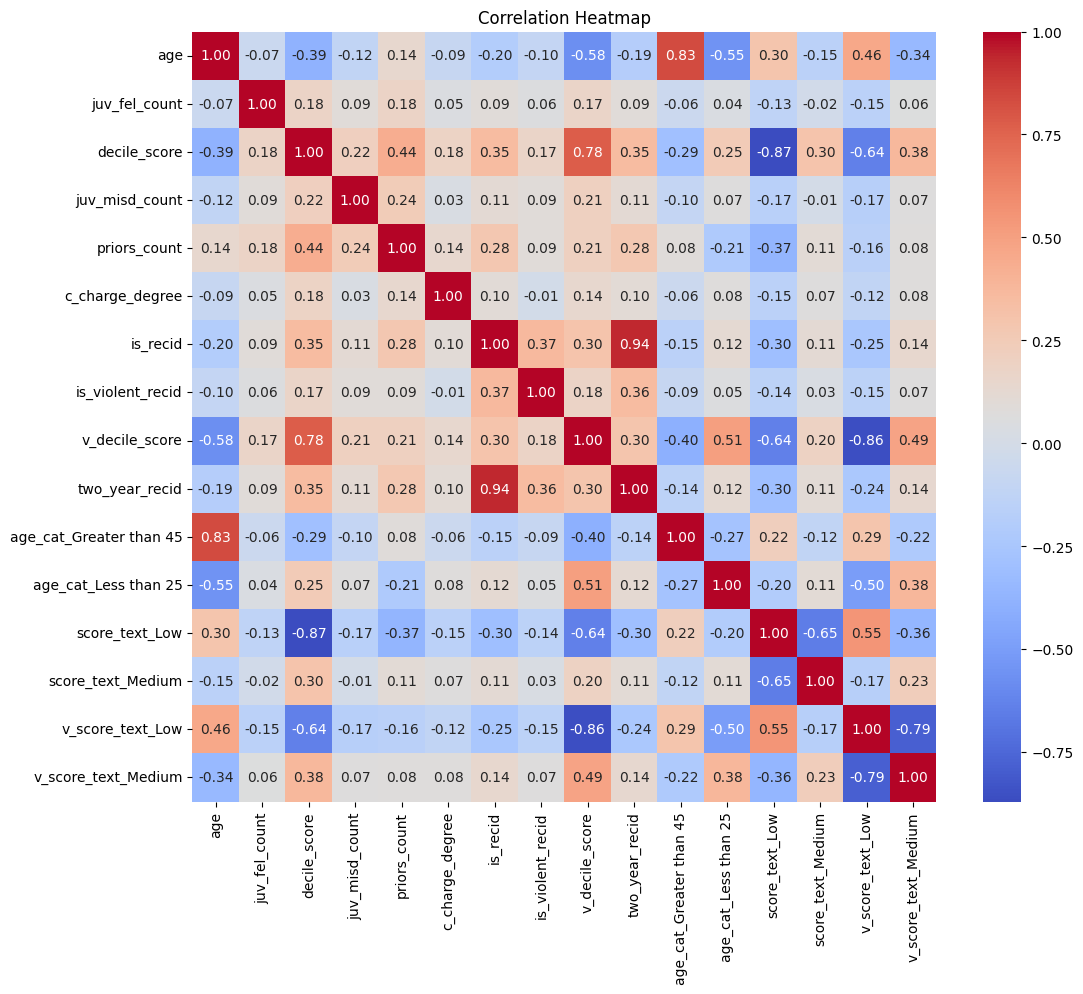

In [41]:
# prompt: create a correlation heatmap

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame as defined in the previous code
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [42]:
df.head()

,age,juv_fel_count,decile_score,juv_misd_count,priors_count,c_charge_degree,is_recid,is_violent_recid,v_decile_score,two_year_recid,age_cat_Greater than 45,age_cat_Less than 25,score_text_Low,score_text_Medium,v_score_text_Low,v_score_text_Medium
0,69,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0
1,34,0,3,0,0,1,1,1,1,1,0,0,1,0,1,0
2,24,0,4,0,4,1,1,0,3,1,0,1,1,0,1,0
3,23,0,8,1,1,1,0,0,6,0,0,1,0,0,0,1
4,43,0,1,0,2,1,0,0,1,0,0,0,1,0,1,0


In [43]:
df['priors_per_age'] = df['priors_count'] / df['age']
df['juv_total'] = df['juv_fel_count'] + df['juv_misd_count']
df['past_recidivism_ratio'] = df['priors_count'] / (df['age'] - 18 + 1)  # Normalizing by age

<Axes: xlabel='decile_score', ylabel='two_year_recid'>

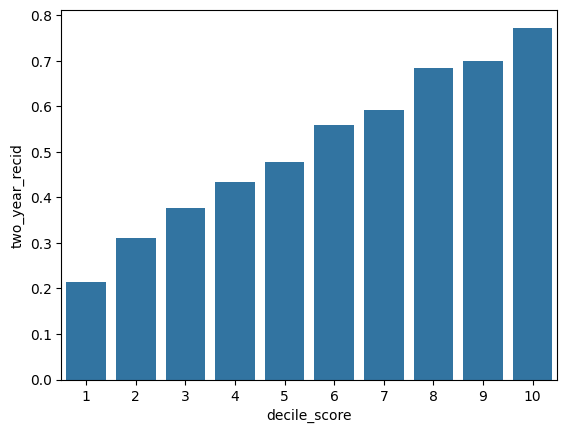

In [44]:
sns.barplot(x='decile_score', y='two_year_recid', data=df, estimator=lambda x: sum(x) / len(x), errorbar=None)

<Axes: >

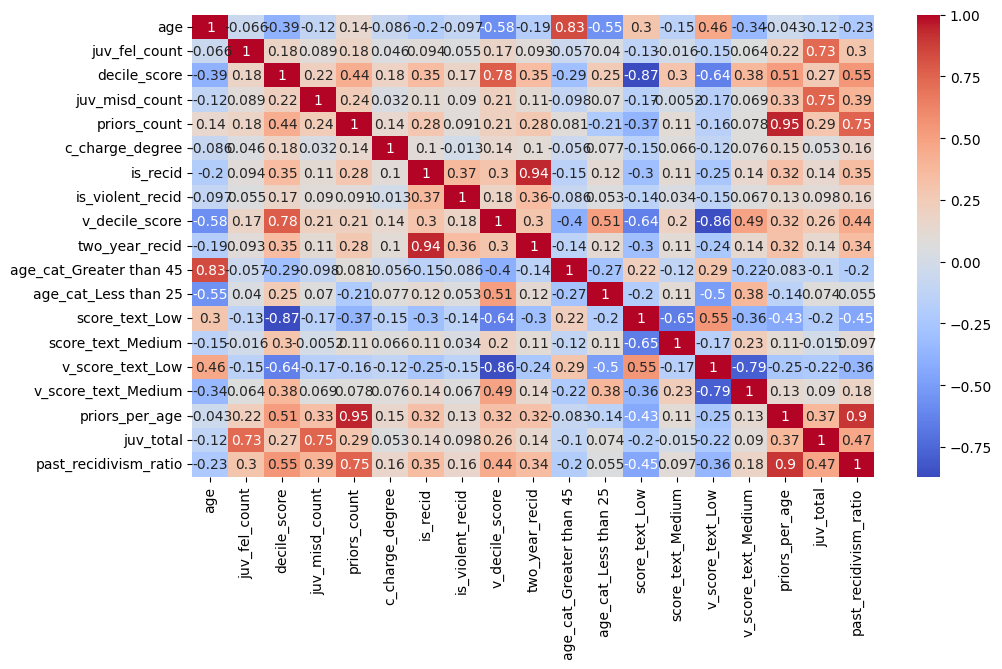

In [45]:
plt.figure(figsize=(11, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [46]:
columns_related_to_recid = ['decile_score', 'v_decile_score', 'is_recid', 'is_violent_recid']

In [47]:
df = df.drop(columns=columns_related_to_recid)

# Train Test Split

In [48]:
df.head()

,age,juv_fel_count,juv_misd_count,priors_count,c_charge_degree,two_year_recid,age_cat_Greater than 45,age_cat_Less than 25,score_text_Low,score_text_Medium,v_score_text_Low,v_score_text_Medium,priors_per_age,juv_total,past_recidivism_ratio
0,69,0,0,0,1,0,1,0,1,0,1,0,0.000000,0,0.000000
1,34,0,0,0,1,1,0,0,1,0,1,0,0.000000,0,0.000000
2,24,0,0,4,1,1,0,1,1,0,1,0,0.166667,0,0.571429
3,23,0,1,1,1,0,0,1,0,0,0,1,0.043478,1,0.166667
4,43,0,0,2,1,0,0,0,1,0,1,0,0.046512,0,0.076923


In [49]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [50]:
X = df.drop(columns=['two_year_recid'],axis=1)
y = df['two_year_recid']

In [51]:
X.shape

(7214, 14)

In [52]:
y.shape

(7214,)

In [53]:
y.value_counts()

,count
two_year_recid,
0,3963
1,3251


In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
print(y_train.value_counts())
print(y_test.value_counts())

two_year_recid
0    3140
1    2631
Name: count, dtype: int64
two_year_recid
0    823
1    620
Name: count, dtype: int64


# XGBoost

In [56]:
model_1 = xgb.XGBClassifier(random_state=42)
model_1.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [57]:
y_pred = model_1.predict(X_test)

Accuracy: 0.6735966735966736
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.75      0.72       823
           1       0.63      0.57      0.60       620

    accuracy                           0.67      1443
   macro avg       0.67      0.66      0.66      1443
weighted avg       0.67      0.67      0.67      1443

Confusion Matrix:
 [[616 207]
 [264 356]]


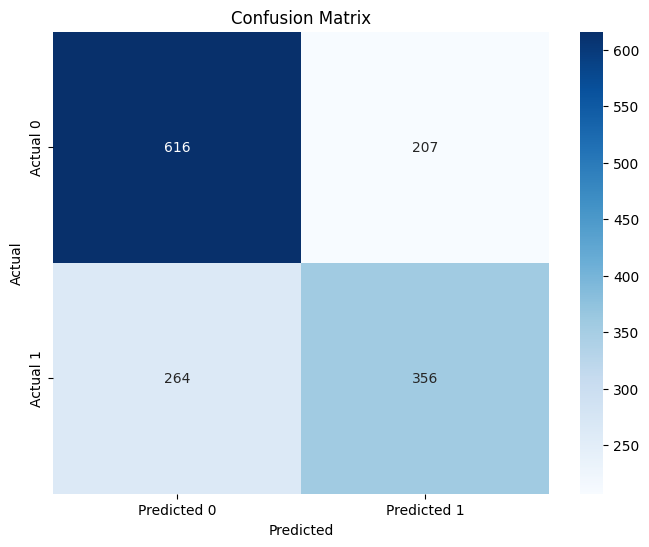

In [58]:
# prompt: calculate accuracy, classification report and confusion matrix

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Generate classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# You can visualize the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Best XGBoost Parameters: {'subsample': 0.6, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.05, 'colsample_bytree': 0.8}
Accuracy with Best XGBoost Parameters: 0.6923076923076923
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.77      0.74       823
           1       0.66      0.59      0.62       620

    accuracy                           0.69      1443
   macro avg       0.69      0.68      0.68      1443
weighted avg       0.69      0.69      0.69      1443

Confusion Matrix:
 [[631 192]
 [252 368]]


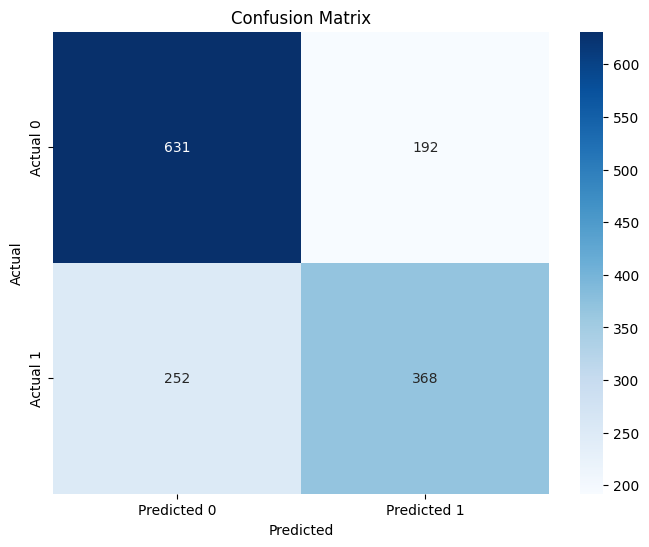

In [59]:
from sklearn.model_selection import RandomizedSearchCV

xgb_param_grid = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

xgb_search = RandomizedSearchCV(model_1, xgb_param_grid, scoring='accuracy', n_iter=20, cv=5, n_jobs=-1, random_state=42)
xgb_search.fit(X_train, y_train)

# Print best parameters
print("Best XGBoost Parameters:", xgb_search.best_params_)
best_xgb = xgb_search.best_estimator_

y_pred_xgb = best_xgb.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"Accuracy with Best XGBoost Parameters: {accuracy_xgb}")

class_report_xgb = classification_report(y_test, y_pred_xgb)
print("Classification Report:\n", class_report_xgb)

# Generate confusion matrix
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
print("Confusion Matrix:\n", conf_matrix_xgb)

# You can visualize the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# SVM

In [60]:
from sklearn.svm import SVC
model_2 = SVC(random_state=42)
model_2.fit(X_train, y_train)

SVC(random_state=42)

In [61]:
y_pred_2 = model_2.predict(X_test)

Accuracy: 0.6943866943866944
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.78      0.74       823
           1       0.67      0.58      0.62       620

    accuracy                           0.69      1443
   macro avg       0.69      0.68      0.68      1443
weighted avg       0.69      0.69      0.69      1443

Confusion Matrix:
 [[642 181]
 [260 360]]


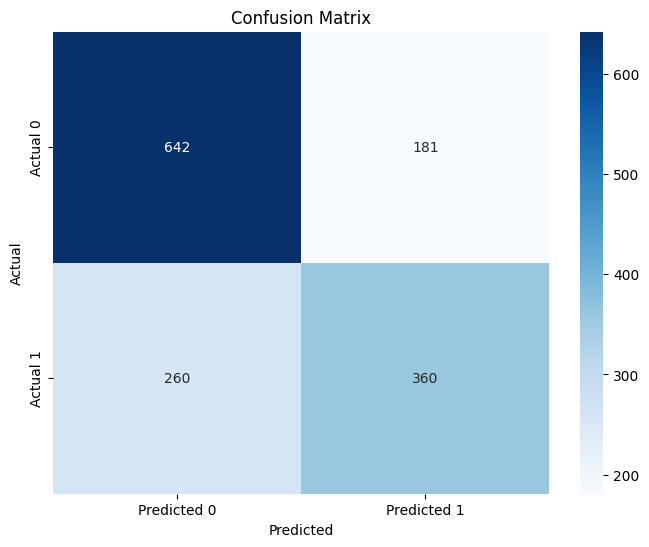

In [62]:
# prompt: calculate accuracy, classification report and confusion matrix

# Calculate accuracy
accuracy_2 = accuracy_score(y_test, y_pred_2)
print(f"Accuracy: {accuracy_2}")

# Generate classification report
class_report_2 = classification_report(y_test, y_pred_2)
print("Classification Report:\n", class_report_2)

# Generate confusion matrix
conf_matrix_2 = confusion_matrix(y_test, y_pred_2)
print("Confusion Matrix:\n", conf_matrix_2)

# You can visualize the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_2, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [66]:
from sklearn.model_selection import RandomizedSearchCV  # Import RandomizedSearchCV

svm_param_dist = {
    'C': [0.1, 1, 10, 50],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Use RandomizedSearchCV for random sampling of hyperparameters
svm_search = RandomizedSearchCV(model_2, svm_param_dist, n_iter=10, scoring='accuracy', cv=3,
                                n_jobs=-1, random_state=42)  # n_iter controls the number of random trials

svm_search.fit(X_train, y_train)

# Print best parameters
print("Best SVM Parameters:", svm_search.best_params_)
best_svc = svm_search.best_estimator_

# Make predictions
y_pred_svm = best_svc.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy with Best SVM Parameters: {accuracy_svm}")

# Generate classification report
class_report_svm = classification_report(y_test, y_pred_svm)
print("Classification Report:\n", class_report_svm)

# Generate confusion matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print("Confusion Matrix:\n", conf_matrix_svm)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

KeyboardInterrupt: 

# Gradient Boosted Decision Trees

In [63]:
from sklearn.ensemble import GradientBoostingClassifier
model_3 = GradientBoostingClassifier(random_state=42)
model_3.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [64]:
y_pred_3 = model_3.predict(X_test)

Accuracy: 0.6909216909216909
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.76      0.74       823
           1       0.65      0.59      0.62       620

    accuracy                           0.69      1443
   macro avg       0.68      0.68      0.68      1443
weighted avg       0.69      0.69      0.69      1443

Confusion Matrix:
 [[629 194]
 [252 368]]


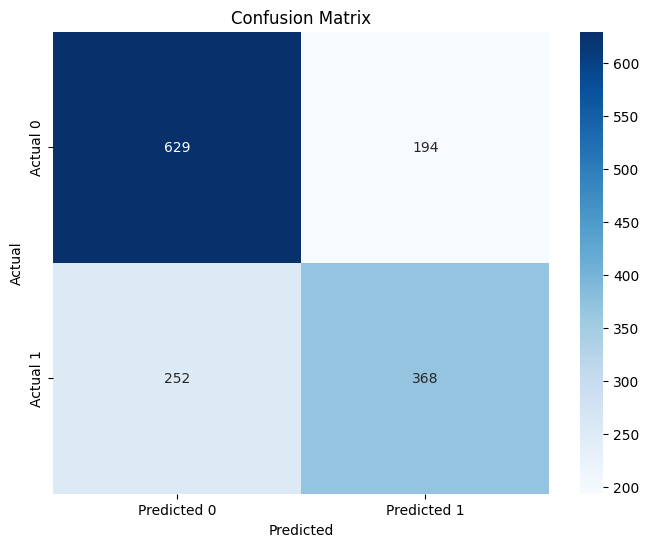

In [65]:
# Calculate accuracy
accuracy_3 = accuracy_score(y_test, y_pred_3)
print(f"Accuracy: {accuracy_3}")

# Generate classification report
class_report_3 = classification_report(y_test, y_pred_3)
print("Classification Report:\n", class_report_3)

# Generate confusion matrix
conf_matrix_3 = confusion_matrix(y_test, y_pred_3)
print("Confusion Matrix:\n", conf_matrix_3)

# You can visualize the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_3, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best GBDT Parameters: {'subsample': 0.6, 'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 5, 'max_depth': 3, 'learning_rate': 0.01}
Accuracy: 0.6916146916146916
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.76      0.74       823
           1       0.65      0.60      0.62       620

    accuracy                           0.69      1443
   macro avg       0.69      0.68      0.68      1443
weighted avg       0.69      0.69      0.69      1443

Confusion Matrix:
 [[628 195]
 [250 370]]


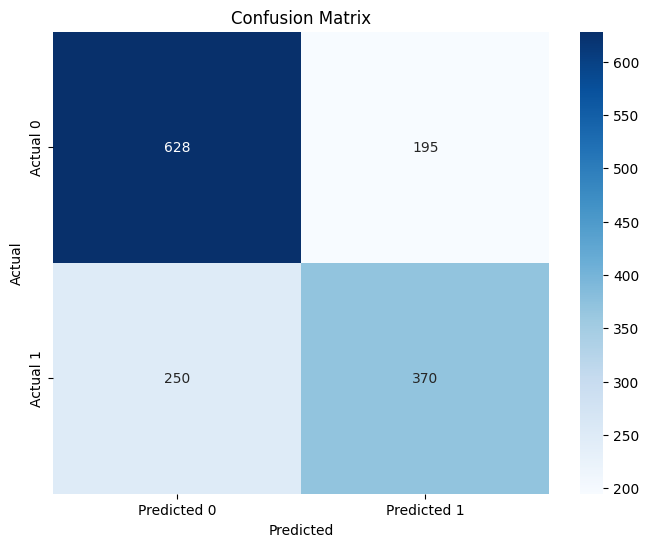

In [68]:
# Define hyperparameter search space
param_dist = {
    'n_estimators': [100, 200, 500, 1000],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6, 7],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5, 10]
}

# Perform Randomized Search
gbdt_search = RandomizedSearchCV(
    model_3, param_dist, n_iter=20, scoring='r2', cv=3,
    n_jobs=-1, random_state=42, verbose=1
)

# Fit the model
gbdt_search.fit(X_train, y_train)

# Get best model
best_gbdt = gbdt_search.best_estimator_
print("Best GBDT Parameters:", gbdt_search.best_params_)

# Make predictions
y_pred_gbdt = best_gbdt.predict(X_test)

# Calculate accuracy
accuracy_gbdt = accuracy_score(y_test, y_pred_gbdt)
print(f"Accuracy: {accuracy_gbdt}")

# Generate classification report
class_report_gbdt = classification_report(y_test, y_pred_gbdt)
print("Classification Report:\n", class_report_gbdt)

# Generate confusion matrix
conf_matrix_gbdt = confusion_matrix(y_test, y_pred_gbdt)
print("Confusion Matrix:\n", conf_matrix_gbdt)

# You can visualize the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gbdt, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()